# Applying Linear Regression to housing price
## Linear Regression
Linear Regression is a linear model: one that assumes a linear relationship between inputs 'x' and outputs 'y'.
Single variable linear regression is known as simple linear regression but multiple linear regression can also be used.

Linear regression models can use a variety of 'fitting' techniques one of the most common being least squares. The least squares method aims to find the best fitting line to represent a relationship between an independent (input) variable and a dependent (output).

This notebooks exists as an exploration of the US Housing price dataset and basic features related to implementation of linear regression


### Data and Tools

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
#Allows charts to be shown and stored in notebook
%matplotlib inline   

### Read and Check data head
Read the csv file into a pandas dataframe

In [97]:
df = pd.read_csv("./datasets/USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Check dataset info
dataframe.info() returns details about the number and consistency of entries
dataframe.columns returns the column names used in the dataset

In [98]:
df.info()
print("")
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB



Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Statistical information scope
dataframe.describe(percentiles=[a,b,...,xn])
Used to output statistics related to the distribution and shape of the data, e.g. count, mean, deviation, etc.
Percentiles are optionally included at vals 0 < x < 1

In [99]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Plotting and Visualisation
#### Using pairplots in seaborn

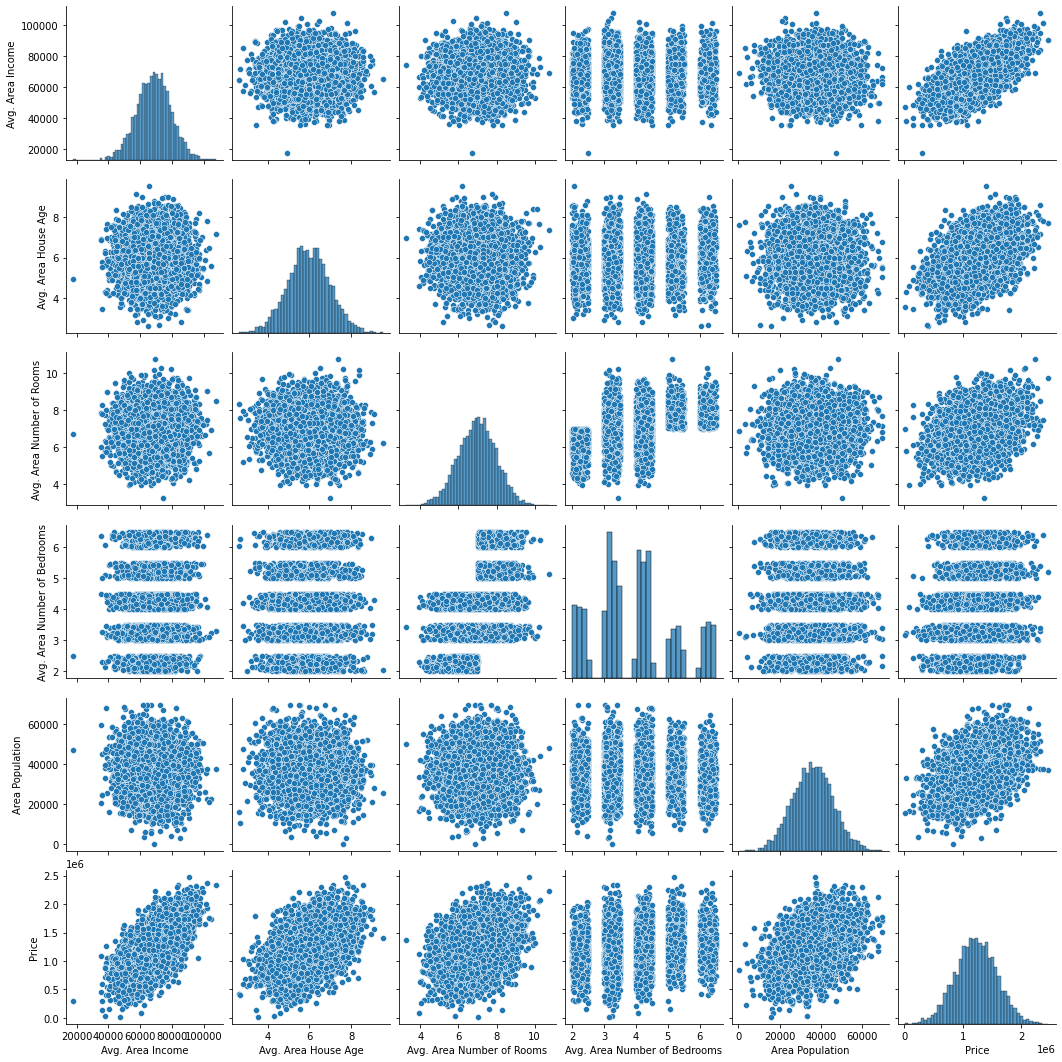

In [100]:
sns.pairplot(df)

#### Histogram in Bokeh

In [101]:
output_notebook()

Loading BokehJS ...

In [102]:
hist, edges = np.histogram(df['Price'], density=True, bins=25)
np
p = figure(title="Price Histogram")
p.quad(top=hist, bottom=0,left=edges[:-1], right=edges[1:], line_color="white")

show(p)

### The same chart in Matplotlib

<AxesSubplot:ylabel='Frequency'>

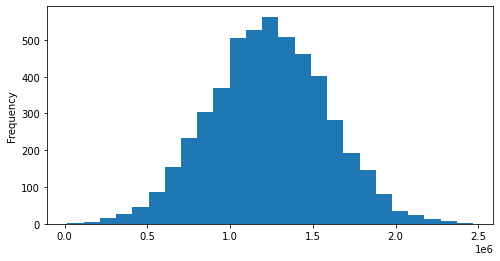

In [103]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

### Line Charts MPL
[Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)

<AxesSubplot:ylabel='Density'>

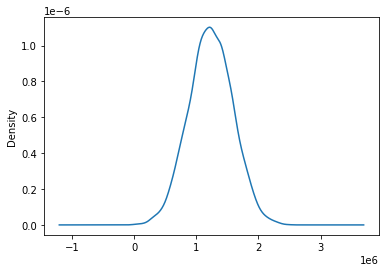

In [104]:
df['Price'].plot.density()

### Correlation Matrix and heatmap
A correlation matrix is returned as a table displaying the correlation coefficients for different variables. Correlation coefficients are simply a measurement of how strong a relationship between 2 variables is.

In [105]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


We can create a heatmap representating the correlation matrix using matplotlib and Seaborn

<AxesSubplot:>

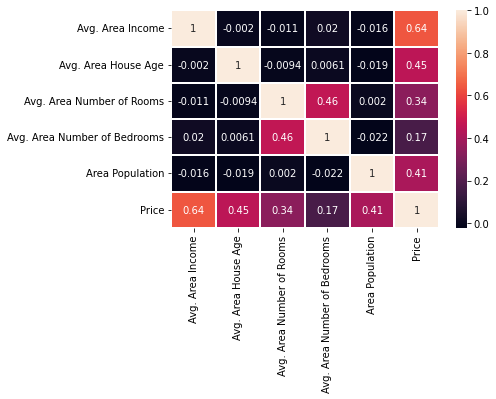

In [106]:
plt.figure()
sns.heatmap(df.corr(), annot=True,linewidths=2)

### Feature Analysis and Set Creation
A closer look into the features in the data set and how we can split a set into simple Test-Train-Validation

In [107]:
col_list = list(df.columns)
col_list

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

### Feature Seperation
Having selected Price as our dependent variable we want to to seperate all numerical variables into 2 vectors.
Independent variables are placed in an input feature vector 'x',  and Price is placed into our output vector 'y'.
Address is a string and so will not be included here as part of the input vector.

In [108]:
count_cols = len(df.columns)
X = df[col_list[0:count_cols-2]]    # Feature vector is created from the first 5 cols
y = df[col_list[count_cols-2]]      # Output Vector is created from a single field 'Price'

In [109]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


### Split set into Test-Train
Using the Scikit-learn library we can easily split boths sets into training and test sets

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

We can check the distribution of samples into our test and training sets.

In [111]:
print("Feature train set size:",X_train.shape)
print("Feature test set size:",X_test.shape)
print("Variable train set size:",y_train.shape)
print("Variable test set size:",y_test.shape)

Feature train set size: (3500, 5)
Feature test set size: (1500, 5)
Variable train set size: (3500,)
Variable test set size: (1500,)


### Training our Model
Here we start using Scikit learns linear regression model to create a linear regression object 

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()

#### Fitting the model to the Linear Regression object
Minimises the residual sum of squares between the 'targets observed' (input data) and 'targets predicted' output data.
We use the .fit() function against the Training data for inputs 'X' and outputs 'y'

In [113]:
lm.fit(X_train, y_train)

LinearRegression()

#### The intercepts and coefficients
SciKit Linear Regression model stores the intercept and coefficient terms in the Linear Regression obj 'lm'
The coefficient term is a measure of how closely the observation points conform to the regression line and the intercept os the point at which the regression line crosses the y-axis

In [114]:
print("The coefficients of the linear model are: ",lm.coef_)
print("The intercept term of the linear model is: ",lm.intercept_)

The coefficients of the linear model are:  [2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]
The intercept term of the linear model is:  -2638673.4261902785


In [115]:
idict = {'Coefficients':lm.intercept_}
idf = pd.DataFrame(data=idict,index=['Intercept'])
idf

,Coefficients
Intercept,-2.638673e+06


##### Cumulative Distribution Function


In [116]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


#### Calcluation of standard errors and t-statistics for the coefficients
##### t-statistic
The test statistic (t-statistic) allow statisticians to use sample data to test hypothesis about an unkown population mean. Does not require any knowledge of the population standard deviation.
When ruynning a hypothesis test we use the t-statistic with a p value. The p value tells us what the odds that our results have happened by chance. 
Example: A group of friends score's an average of 205 on a bowling game, we know the average bowler scores 79.7, *higher is better in bowling*, should the groupf of friends consider themselves within the level of professionals, are the scores a fluke?
The t-statistic and the probability value helps us decide. Finding these values gives evidence of a significant difference between the teams mean and the population mean.

The greater the T value the stronger the evidence that the teams score are significantly different from average. Smaller T values imply that the teams scores are not significantly different from average. 205 is significantly different from the average 79.7, if this is coupled with a p-value greater than 5% we could put that down to chance but if the p-value was small <5% the team may have to consider a professional career in bowling.

##### Standard Error
The Standard Error is the standard deviation of sample means. It tells us how accurate the mean of a given sample from a population is, the higher the standard error the more spread out the means are. A high Standard Error therefore tells us that those means are not accurately representing the true population mean.
Like Standard Deviation, the Standard Error is a measure of spread. 

In [117]:
n_samples = X_train.shape[0]    # no. of samples in population
k_groups = X_train.shape[1]     # no. of different groups
degreesFreedomNumerator = n_samples - k_groups

train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error = np.sum(train_error)

standard_err = [0,0,0,0,0]

for i in range(k_groups):
    r = (sum_error/degreesFreedomNumerator)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    standard_err[i]=np.sqrt(r)

cdf['Standard Error']=standard_err
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
Avg. Area Income,21.625799,0.159454,135.624094
Avg. Area House Age,165590.392746,1733.940193,95.499483
Avg. Area Number of Rooms,119827.783390,1697.450899,70.592783
Avg. Area Number of Bedrooms,2361.095262,1400.278827,1.686161
Area Population,15.216581,0.172598,88.161794


#### Review the features in order of importance for predicting the house value
We can now look at the t-statistic and standard error to order our features in terms of importance on predicting the house price.

In [118]:
print('Features by order of importance for housing price prediction:\n','-'*90,sep='')
prior_list=list(cdf.sort_values('t-statistic',ascending=False).index)
print("\n".join(('%d. '%i+prior_list[i] for i in range(0,5))))

Features by order of importance for housing price prediction:
------------------------------------------------------------------------------------------
0. Avg. Area Income
1. Avg. Area House Age
2. Area Population
3. Avg. Area Number of Rooms
4. Avg. Area Number of Bedrooms


#### Plotting visualisation of features by importance in MatplotLib scatter graphs

Text(0.5, 1.0, 'Area Population vs. Price')

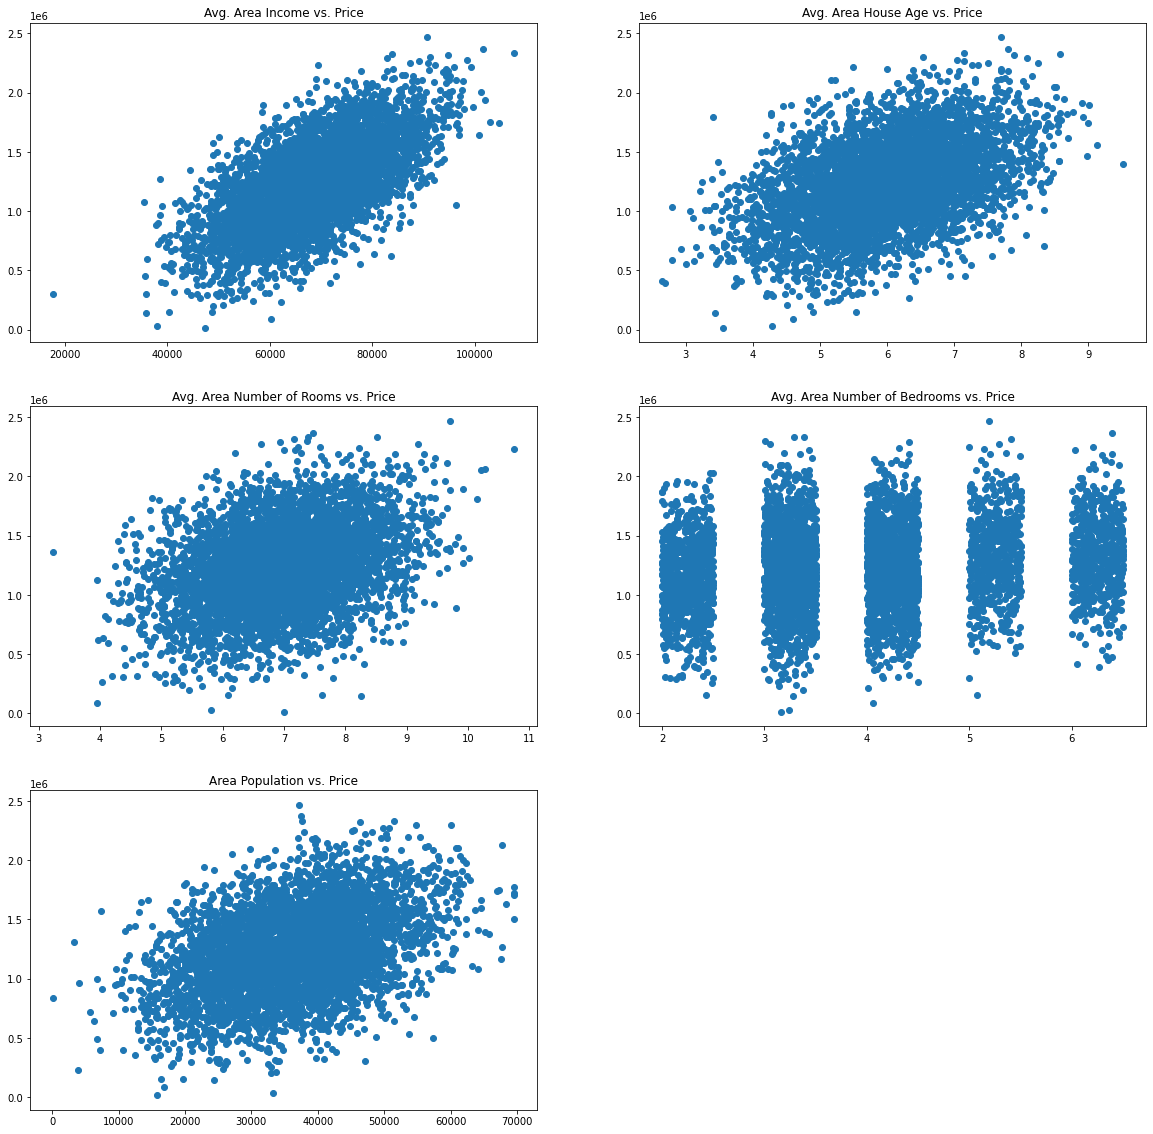

In [119]:
feature_list=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(20,20))
gridFeature = gridspec.GridSpec(3,2)

ax0 = plt.subplot(gridFeature[0])
ax0.scatter(df[feature_list[0]], df['Price'])
ax0.set_title(feature_list[0]+" vs. Price") 

ax0 = plt.subplot(gridFeature[1])
ax0.scatter(df[feature_list[1]], df['Price'])
ax0.set_title(feature_list[1] + " vs. Price") 

bx0 = plt.subplot(gridFeature[2])
bx0.scatter(df[feature_list[2]], df['Price'])
bx0.set_title(feature_list[2] + " vs. Price") 

bx1 = plt.subplot(gridFeature[3])
bx1.scatter(df[feature_list[3]], df['Price'])
bx1.set_title(feature_list[3] + " vs. Price") 

cx0 = plt.subplot(gridFeature[4])
cx0.scatter(df[feature_list[4]], df['Price'])
cx0.set_title(feature_list[4] + " vs. Price") 


#### Calculating the r square model of the fit.
The R-squared is used as a 'goodness-of-fit' measure for linear regression models. As a statistic it indicates the percentage of variance in the depentdent variable that the independent variables explain collectively.
In other words it is the strength of the relationship between the model and the observed data.

The SciKit library has an r2_score metric calculator

In [120]:
print("The R-squared value of this fit is: ", round(metrics.r2_score(y_train,train_pred),3))

The R-squared value of this fit is:  0.919


#### Predictions, error estimation and regression evaluation matrices:
##### Predicting using the Linera Regression 'lm' model
We can take a look at the type of object that is created for our predictions and also the size to get an idea of what we're dealing with.


In [121]:
predictions = lm.predict(X_test)
print("Prediction object type: ", type(predictions))
print("Prediction object size: ", predictions.shape)

Prediction object type:  <class 'numpy.ndarray'>
Prediction object size:  (1500,)


##### A Scatter plot of the predicted price against y_test
Checking to see if our data now falls on a 45 degreee straight line. The tighter the line is here the more accurate our prediction model is against the test set. This may not correlate to real world usefulness given the potential for overfitting or factors we haven't measured for.

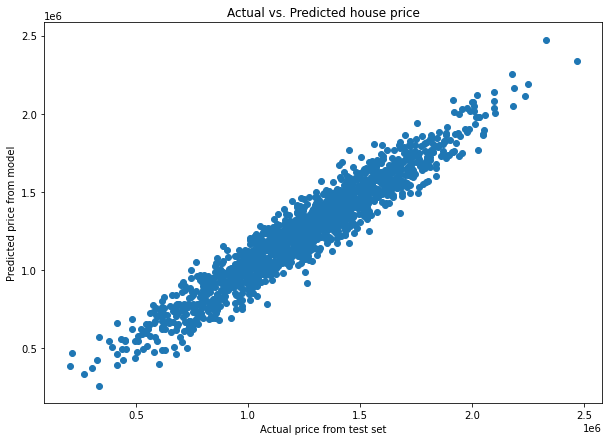

In [126]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. Predicted house price")
plt.xlabel("Actual price from test set")
plt.ylabel("Predicted price from model")
plt.scatter(x=y_test,y=predictions)
plt.show()

##### Plotting a histogram of the Residuals
This graph can show us whether variance is normally ditributed. Symmetrically bell-shaped histograms evenly distributed aroud 0 indicates that the 'Normality Assumption', i.e. the sampling distribution of the mean is normal, is true.

/Users/johncmcc/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of Residuals'}, xlabel='Residuals', ylabel='Kernel density'>

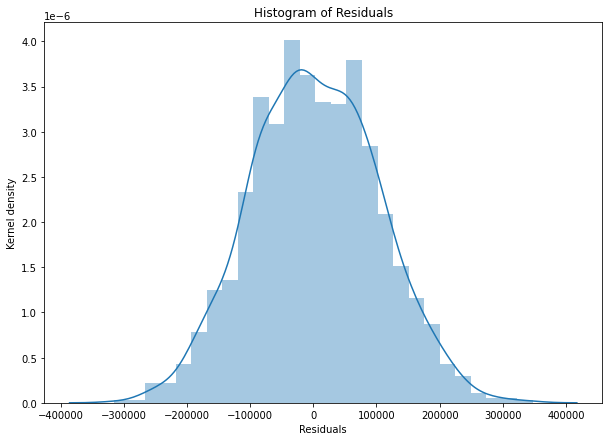

In [129]:
plt.figure(figsize=(10,7))
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Kernel density")
sns.distplot([y_test-predictions])

##### Scatter plot of Residuals and Predicted Values

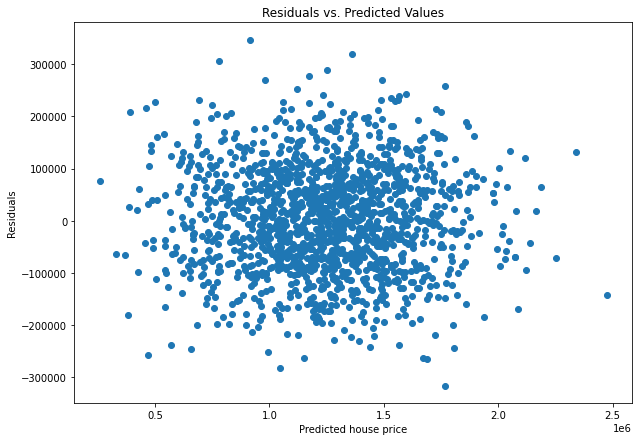

In [130]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted house price")
plt.ylabel("Residuals")
plt.scatter(x=predictions,y=y_test-predictions)

##### Regression evaluation matrices

In [131]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 81135.56609336872
Mean square error (MSE): 10068422551.400831
Root mean square error (RMSE): 100341.52954485411


##### R-Square Value

In [132]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.915
